# Ken Woon's Notebook

## Dataset Overview

In [104]:
#Import required library
import pandas as pd

#Read CSV file into the variable
df = pd.read_csv('../data/raw/crimedata_csv_all_years.csv')

#Display the dataset
display(df)

#Print data info
print(df.info())

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Theft from Vehicle,2006,3,4,20,30,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
1,Theft from Vehicle,2006,3,5,11,30,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
2,Theft from Vehicle,2006,4,16,0,1,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
3,Theft from Vehicle,2006,6,11,17,45,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
4,Theft from Vehicle,2006,8,5,20,0,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
...,...,...,...,...,...,...,...,...,...,...
793911,Theft from Vehicle,2005,3,9,21,30,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
793912,Theft from Vehicle,2005,6,5,23,0,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
793913,Theft from Vehicle,2005,8,1,22,0,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
793914,Theft from Vehicle,2005,12,14,0,0,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793916 entries, 0 to 793915
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TYPE           793916 non-null  object 
 1   YEAR           793916 non-null  int64  
 2   MONTH          793916 non-null  int64  
 3   DAY            793916 non-null  int64  
 4   HOUR           793916 non-null  int64  
 5   MINUTE         793916 non-null  int64  
 6   HUNDRED_BLOCK  793904 non-null  object 
 7   NEIGHBOURHOOD  793783 non-null  object 
 8   X              793843 non-null  float64
 9   Y              793843 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 60.6+ MB
None


In [108]:
#Set identifier "TYPE" as string
df['TYPE'] = df['TYPE'].astype('str')

#Set categorical data
df['HUNDRED_BLOCK'] = df['HUNDRED_BLOCK'].astype('category')
df['NEIGHBOURHOOD'] = df['NEIGHBOURHOOD'].astype('category')

## Exploratory Data Analysis

### 1. Understanding the Variables

The dataset for this project is the historical crime data in Vancouver. In order to open the file and start with the analysis, the libraries required are needed to be imported first, which is done below. The CSV file is then read using `pandas` into a variable called `df`.

In [102]:
#Imported all of the libraries that would be needed for the analysis
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

#Read CSV file into the variable
df = pd.read_csv('../data/raw/crimedata_csv_all_years.csv')

In [5]:
#Display first 5 rows of the dataset
display(df.head())

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Theft from Vehicle,2006,3,4,20,30,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
1,Theft from Vehicle,2006,3,5,11,30,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
2,Theft from Vehicle,2006,4,16,0,1,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
3,Theft from Vehicle,2006,6,11,17,45,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06
4,Theft from Vehicle,2006,8,5,20,0,DAVIE ST / HOWE ST,Central Business District,490748.5904,5.458346e+06


`.head()` returns the first 5 rows of the dataset. It can be seen that there are 10 columns which are the type of crime, the year, month, day, hour, minute, hundred block, neighbourhood, and the x and y coordinates. It is not certain that these are all the existing columns, thus it will be confirmed right after. From what can be seen, the table only shows `Theft from Vehicle` in the same hundred block, neighbourhood, and x and y coordinates, but at different times. It is not likely for the entire dataset to contain only this type of crime at this location, and will be checked in the analysis section.

In [6]:
#Display number of rows and columns
print(df.shape)
print(f"The number of rows is {df.shape[0]} and the number of columns is {df.shape[1]}")

(793916, 10)
The number of rows is 793916 and the number of columns is 10


`.shape` returns the number of rows by the number of columns of the dataset. The output was `(793916, 10)`, meaning that there are 793916 rows and 10 columns in total.

In [7]:
#Display the name of the columns
print(df.columns)

Index(['TYPE', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'HUNDRED_BLOCK',
       'NEIGHBOURHOOD', 'X', 'Y'],
      dtype='object')


`.columns` returns the name of all the columns in the dataset. It is confirmed that the table displayed earlier shows all the 10 existing columns with the same name as the ones in this list.

The next step would be to better understand the values for each variable. `.nunique()` will be used to return the number of unique values for each column. By specifying the column axis, `axis = 0` in this case, the method will search column-wise and return the number of unique values for each row.

In [16]:
#Display number of unique values for each variable
print(df.nunique(axis = 0))

TYPE                 11
YEAR                 19
MONTH                12
DAY                  31
HOUR                 24
MINUTE               60
HUNDRED_BLOCK     22939
NEIGHBOURHOOD        24
X                139461
Y                139296
dtype: int64


It can be seen that there are indeed other types of crimes other than `Theft from Vehicle` as there are more than 1 type. There are 19 years spanned by the data, however, it is not known what the starting and ending year is at the moment. There also seems to be a wide range of areas covered from looking at the number of hundred blocks and neighbourhood present in the data.

In [17]:
#Display summary of numerical variables
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,YEAR,MONTH,DAY,HOUR,MINUTE,X,Y
count,793916.000000,793916.000000,793916.000000,793916.000000,793916.000000,793843.000000,793843.000000
mean,2011.189500,6.494100,15.394095,12.397745,15.711429,450191.835386,4991158.124679
std,5.528776,3.417018,8.757672,7.445387,18.302254,137534.630035,1524555.068773
min,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,4.000000,8.000000,7.000000,0.000000,490179.610700,5454241.958800
50%,2011.000000,7.000000,15.000000,14.000000,5.000000,491556.822500,5457160.397300
75%,2016.000000,9.000000,23.000000,19.000000,30.000000,493389.994600,5458717.612400
max,2021.000000,12.000000,31.000000,23.000000,59.000000,511303.000000,5512579.000000


`.describe()` displays a summary of the count, mean, standard deviation, minimum, 25%, 50%, 75% , and maximum of the values for each numeric variable. The code that follows formats each row and supresses scientific notation. From this output, it can be deduced that the dataset spans the years 2003 to 2021 with crimes occuring at a mean hour during 12 noon. The other values despite being a good indication for the expectation of each variables, do not give much useful information and thus will be further explored later. The table is also exclusive to numerical variables, meaning that the information about string variables are not provided.

In [18]:
#Display unique values for TYPE column
print(df.TYPE.unique())

#Display unique values for HUNDRED_BLOCK column
print(df.HUNDRED_BLOCK.unique())

#Display unique values for NEIGHBOURHOOD column
print(df.NEIGHBOURHOOD.unique())

['Theft from Vehicle' 'Theft of Bicycle' 'Theft of Vehicle'
 'Vehicle Collision or Pedestrian Struck (with Fatality)'
 'Vehicle Collision or Pedestrian Struck (with Injury)'
 'Break and Enter Commercial' 'Break and Enter Residential/Other'
 'Homicide' 'Mischief' 'Offence Against a Person' 'Other Theft']
['DAVIE ST / HOWE ST' 'DAVIE ST / JERVIS ST' 'DAVIE ST / MAINLAND ST' ...
 'CYPRESS ST / W 54TH AVE' 'CYPRESS ST / W 57TH AVE'
 'CYPRESS ST / W BROADWAY AV']
['Central Business District' 'West End' 'Shaughnessy'
 'Renfrew-Collingwood' 'West Point Grey' 'Dunbar-Southlands' 'Killarney'
 'Victoria-Fraserview' 'Kensington-Cedar Cottage' 'Kerrisdale' 'Kitsilano'
 'Grandview-Woodland' 'Hastings-Sunrise' 'Strathcona' 'Fairview'
 'Riley Park' 'Mount Pleasant' 'Sunset' 'Oakridge' 'Marpole'
 'Arbutus Ridge' 'South Cambie' 'Musqueam' 'Stanley Park' nan]


`.unique()` is used on the discrete variables to show each of their unique values in the columns. From the previous results, it is known that there are 11 types of different values for the type of crimes. There are indeed 11 unique strings shown in the block above. Only a handful of the hundred block is printed due to the overwhelming number of 22939 unique values. All the 24 neighbourhood values are displayed alongside as well.

### 2. Cleaning the Dataset

The objective of this section is to clean the dataset in order to avoid any misleading data and to remove unused blocks. The procedure would be to remove redundant variables, make a better variable selection, remove outliers, and removing null value rows.

Although having more information may seem better at first glance, there are times when too much information becomes too distracting. The research questions that would be explored further in this analysis are **"At what times do the crimes occur the most?"** and **"Which years had the most criminal cases, and why is it so?"**. In this case, as there would be a heavy emphasis on time and date, and less on location, the variables that contain information about the crime locations become redundant. These include the hundred block, neighbourhood, x, and y columns specifically. All these columns will be removed below.

In [87]:
#Drop the specified columns on a copy and assign it to a new variable
df_cleaned = df.copy().drop(['HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y'], axis = 1)

#Display first 5 rows of the new dataset
df_cleaned.head()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE
0,Theft from Vehicle,2006,3,4,20,30
1,Theft from Vehicle,2006,3,5,11,30
2,Theft from Vehicle,2006,4,16,0,1
3,Theft from Vehicle,2006,6,11,17,45
4,Theft from Vehicle,2006,8,5,20,0


The following step is to remove any columns that have enough null values that may affect the analysis results later. The code below checks if any null values exist in the dataset.

In [74]:
#Check for any existing null value
df_cleaned.isnull().values.any()

False

As there are no null values in the data, this dataset cleaning step can be skipped.

Next would be to check for any outlier values. From the `.describe()` block, it shows that the range of values for month, day, and hour are 1-12, 1-31, and 0-23 respectively. These ranges are as expected for their respective variables, thus there are no outliers to be deleted. Another important factor to consider is the range of datetime covered by each year. As it is required for all the years to cover cases reported from January to December for an equal data distribution, the start and end date for this dataset have to be validated. In order to do this, a new column will be added called 'datetime', and from this column, the maximum and minimum value can be obtained.

In [88]:
#Make temp dataframe
df_dt = df_cleaned.copy().drop(['TYPE'], axis = 1)

#Get datetime and add to original dataframe as a new column
df_cleaned['DATETIME'] = pd.to_datetime(df_dt)

#Print max and min datetime
print(f'''The earliest reported criminal case was: {df_cleaned["DATETIME"].min()}
The latest reported criminal case was: {df_cleaned["DATETIME"].max()}''')

The earliest reported criminal case was: 2003-01-01 00:00:00
The latest reported criminal case was: 2021-05-14 16:22:00


The output shows that the dataset starts from the beginning of 2003 but stops midway through 2021. For a more equally distributed data, all values from 2021 will be removed.

In [92]:
#Delete row with year 2021 and sort by datetime
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned.YEAR == 2021].index).sort_values(by = ['DATETIME'])

#Display dataset
display(df_cleaned)

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,DATETIME
380033,Offence Against a Person,2003,1,1,0,0,2003-01-01 00:00:00
237038,Break and Enter Residential/Other,2003,1,1,0,0,2003-01-01 00:00:00
504270,Other Theft,2003,1,1,0,0,2003-01-01 00:00:00
368861,Offence Against a Person,2003,1,1,0,0,2003-01-01 00:00:00
38136,Theft of Bicycle,2003,1,1,0,0,2003-01-01 00:00:00
...,...,...,...,...,...,...,...
39236,Theft of Bicycle,2020,12,31,22,0,2020-12-31 22:00:00
212466,Break and Enter Residential/Other,2020,12,31,22,30,2020-12-31 22:30:00
281035,Mischief,2020,12,31,22,46,2020-12-31 22:46:00
716545,Theft from Vehicle,2020,12,31,23,0,2020-12-31 23:00:00


The last step consists of removing rows with null values, however, it is previously known that there are no existing null values in the dataset, hence no further data altering would be required.

This concludes the dataset cleaning stage and the final table can be written into a file which would be placed in the processed dataset folder.

In [93]:
#Write dataset locally to CSV file
df_cleaned.to_csv('../data/processed/crimedata_datetime.csv')

### 3. Variable Analysis

The variable analysis would be done on a surface level for now but would be delved into deeper further in this document. Visualization techniques will be used throughout this section in order to aid the analysis of the varaibles.

<AxesSubplot: >

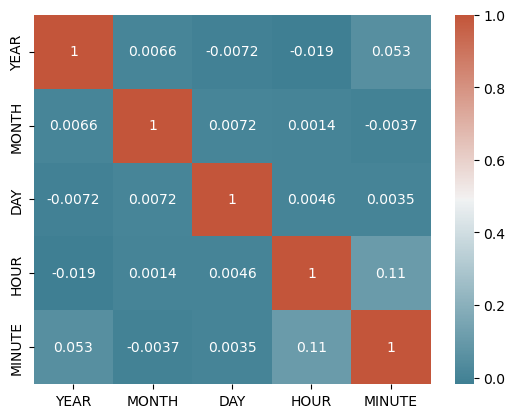

In [94]:
#Create correlation matrix
corr_matrix = df_cleaned.corr()
sns.heatmap(corr_matrix, xticklabels = corr_matrix.columns, yticklabels = corr_matrix.columns, annot = True, cmap = sns.diverging_palette(220, 20, as_cmap = True))

A correlation matrix is useful for picking out any relationship between each variables. The numbers in each box of the graph show the correlation coefficients, which are the numerical representation of how close the two variables are related to each other. The numbers range from 0 up to 1, where 0 signifies no relationship and 1 represents that they are fully dependent on each other. These values can also become negative if there is a negative correlation between them, meaning that an increase of a variable leads to a decrease of the other. The results show that there are barely any correlation between each variable, with a mere maximum coefficient value of 0.11. This means that each column of the dataset do not rely on each other and would be more effective to analyze each variable separately.

[Text(0.5, 1.0, 'Number of criminal cases by Year'),
 Text(0.5, 0, 'Crime Rate'),
 Text(0, 0.5, 'Year')]

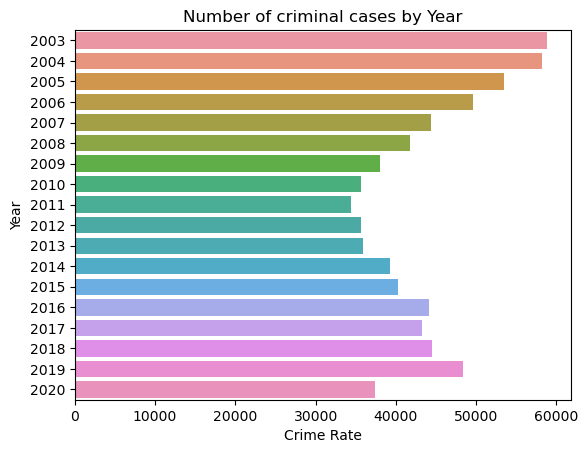

In [95]:
#Create countplot
sns.countplot(y = df_cleaned['YEAR']).set(title = "Number of criminal cases by Year", xlabel = "Crime Rate", ylabel = "Year")

Each variable will be plotted using a countplot for the analysis. From the result above, there seem to be a parabolic relationship between the crime rates throughout the years with a few exceptions. 2003 started with the largest crime rate frequency, slowly decreasing until the turning point of 2011, where it began to increase up until 2019. The crime rate in 2020 dropped by a fair amount. From intuition, it is likely that historical events play a role in affecting the crime rates throughout the years and will be further researched into for the main analysis.

[Text(0.5, 1.0, 'Number of criminal cases by Month'),
 Text(0.5, 0, 'Crime Rate'),
 Text(0, 0.5, 'Month')]

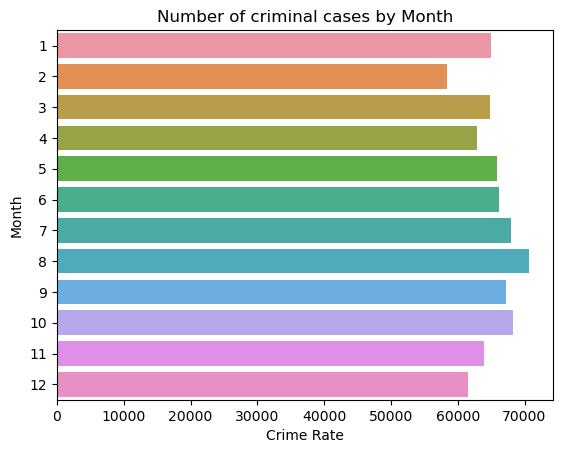

In [96]:
#Create countplot
sns.countplot(y = df_cleaned['MONTH']).set(title = "Number of criminal cases by Month", xlabel = "Crime Rate", ylabel = "Month")

The countplot of the relationship between the crime rates and the months shows a fairly linear graph. Not much can be deduced from this other than that the crime rates are equally split between the months in each year.

[Text(0.5, 1.0, 'Number of criminal cases by Day'),
 Text(0.5, 0, 'Crime Rate'),
 Text(0, 0.5, 'Day')]

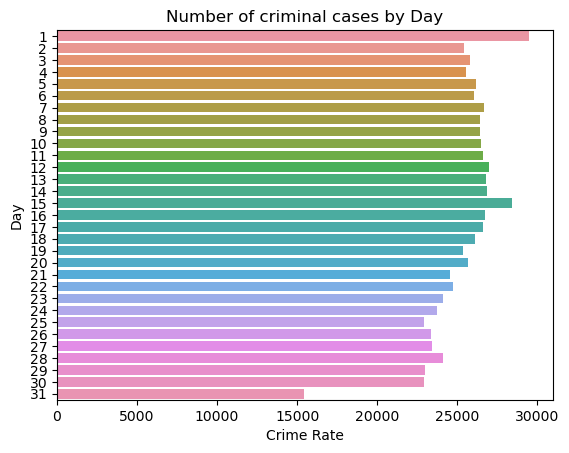

In [97]:
#Create countplot
sns.countplot(y = df_cleaned['DAY']).set(title = "Number of criminal cases by Day", xlabel = "Crime Rate", ylabel = "Day")

From the result of this countplot, it is shown that the most occurence day of crime is on the 1st, followed by the 15th. At the beginning of each month and exactly midway through the months are when crimes happen the most, with a steady rate in between this duration, and a slight decrease after the 15th. The 31st has significantly less crime rates likely due to the fact that this day exists only in half of the months in each year.

[Text(0.5, 1.0, 'Number of criminal cases by Hour'),
 Text(0.5, 0, 'Crime Rate'),
 Text(0, 0.5, 'Hour')]

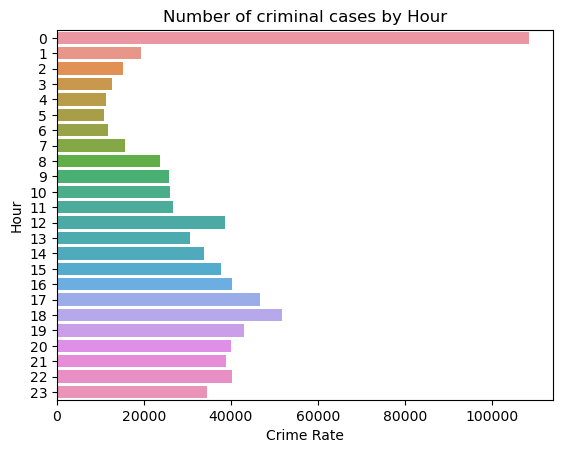

In [98]:
#Create countplot
sns.countplot(y = df_cleaned['HOUR']).set(title = "Number of criminal cases by Hour", xlabel = "Crime Rate", ylabel = "Hour")

Criminal cases occur the most frequent at midnight and leads other hours by a large amount. At 6 p.m. is the next frequent hour. There is a trend of criminal cases happening more often during late evening and especially during midnight, however, drops significantly during the early morning.

[Text(0.5, 1.0, 'Number of criminal cases by Minute'),
 Text(0.5, 0, 'Crime Rate'),
 Text(0, 0.5, 'Minute')]

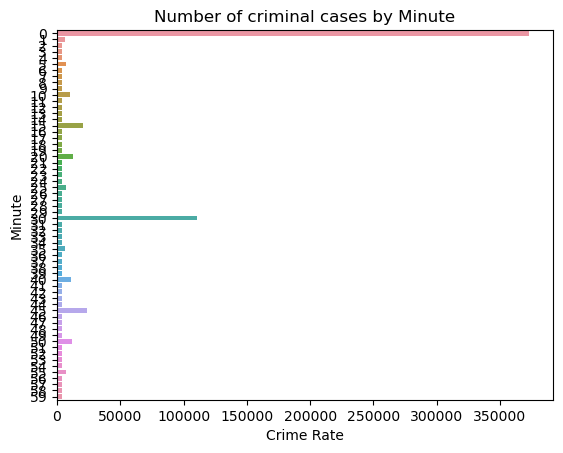

In [99]:
#Create countplot
sns.countplot(y = df_cleaned['MINUTE']).set(title = "Number of criminal cases by Minute", xlabel = "Crime Rate", ylabel = "Minute")

The occurence of criminal cases happen the most frequently on the 0th minute followed by the 30th by a far margin. The frequency for the other minutes are very little in comparison. It is likely that most cases have the minutes rounded to the nearest hour or half-hour.